In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from statsmodels.api import OLS

In [2]:
combined = pd.read_csv("./data/combined.csv",
                        parse_dates=[0], index_col=0)
combined

,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
2014-01-01 00:00:00+00:00,36012,0.0,32425,8086.0,4.981596,0.0,0.0,0.0364,-1.146,0.0,0.0,0.0056,0.2378,0.9562,1.2539
2014-01-01 01:00:00+00:00,36012,0.0,32425,8803.0,4.932105,0.0,0.0,0.0449,-1.104,0.0,0.0,0.0074,0.2428,0.9672,1.2535
2014-01-01 02:00:00+00:00,36012,0.0,32425,8970.0,4.865019,0.0,0.0,0.0513,-1.059,0.0,0.0,0.0129,0.2521,0.9733,1.2530
2014-01-01 03:00:00+00:00,36012,0.0,32425,8510.0,4.842338,0.0,0.0,0.0544,-0.926,0.0,0.0,0.0140,0.2642,0.9651,1.2523
2014-01-01 04:00:00+00:00,36012,0.0,32425,8360.0,4.772505,0.0,0.0,0.0512,-0.746,0.0,0.0,0.0144,0.2764,0.9370,1.2516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,40634,0.0,49021,15303.0,4.212916,0.0,0.0,0.0098,-1.970,0.0,0.0,0.0017,0.0931,0.5102,1.2751
2016-12-31 20:00:00+00:00,40634,0.0,49021,15354.0,4.287475,0.0,0.0,0.0099,-2.130,0.0,0.0,0.0020,0.0944,0.5235,1.2756
2016-12-31 21:00:00+00:00,40634,0.0,49021,14848.0,4.296530,0.0,0.0,0.0093,-2.293,0.0,0.0,0.0020,0.0959,0.5248,1.2759
2016-12-31 22:00:00+00:00,40634,0.0,49021,15056.0,4.419977,0.0,0.0,0.0093,-2.443,0.0,0.0,0.0021,0.0973,0.5319,1.2760


In [3]:
solar = combined[['solar_generation_actual', 'solar_capacity', 'windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
solar

,solar_generation_actual,solar_capacity,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,irradiance_surface,irradiance_toa,precipitation,snowfall,cloud_cover,air_density
2014-01-01 00:00:00+00:00,0.0,36012,4.981596,0.0,0.0,0.0,0.0,0.0364,0.0056,0.9562,1.2539
2014-01-01 01:00:00+00:00,0.0,36012,4.932105,0.0,0.0,0.0,0.0,0.0449,0.0074,0.9672,1.2535
2014-01-01 02:00:00+00:00,0.0,36012,4.865019,0.0,0.0,0.0,0.0,0.0513,0.0129,0.9733,1.2530
2014-01-01 03:00:00+00:00,0.0,36012,4.842338,0.0,0.0,0.0,0.0,0.0544,0.0140,0.9651,1.2523
2014-01-01 04:00:00+00:00,0.0,36012,4.772505,0.0,0.0,0.0,0.0,0.0512,0.0144,0.9370,1.2516
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,0.0,40634,4.212916,0.0,0.0,0.0,0.0,0.0098,0.0017,0.5102,1.2751
2016-12-31 20:00:00+00:00,0.0,40634,4.287475,0.0,0.0,0.0,0.0,0.0099,0.0020,0.5235,1.2756
2016-12-31 21:00:00+00:00,0.0,40634,4.296530,0.0,0.0,0.0,0.0,0.0093,0.0020,0.5248,1.2759
2016-12-31 22:00:00+00:00,0.0,40634,4.419977,0.0,0.0,0.0,0.0,0.0093,0.0021,0.5319,1.2760


# Forecast solar power generation at t+n*h with n: 1-6

In [4]:
solar['solar_generation_t+1'] = solar['solar_generation_actual'].shift(periods=1)
solar['solar_generation_t+2'] = solar['solar_generation_actual'].shift(periods=2)
solar['solar_generation_t+3'] = solar['solar_generation_actual'].shift(periods=3)
solar['solar_generation_t+4'] = solar['solar_generation_actual'].shift(periods=4)
solar['solar_generation_t+5'] = solar['solar_generation_actual'].shift(periods=5)
solar['solar_generation_t+6'] = solar['solar_generation_actual'].shift(periods=6)

<ipython-input-4-6c63a12fbea8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar['solar_generation_t+1'] = solar['solar_generation_actual'].shift(periods=1)
<ipython-input-4-6c63a12fbea8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar['solar_generation_t+2'] = solar['solar_generation_actual'].shift(periods=2)
<ipython-input-4-6c63a12fbea8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [5]:
# Drop the first 6 rows of the DataFrame since we cannot have all the values for 'solar_generation_t+n' for (n:1-6)
solar = solar.drop(solar.index[[0,1,2,3,4,5]])
solar

,solar_generation_actual,solar_capacity,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,irradiance_surface,irradiance_toa,precipitation,snowfall,cloud_cover,air_density,solar_generation_t+1,solar_generation_t+2,solar_generation_t+3,solar_generation_t+4,solar_generation_t+5,solar_generation_t+6
2014-01-01 06:00:00+00:00,1.0,36012,4.721993,0.000000,0.000000,0.0000,0.0002,0.0363,0.0124,0.8494,1.2499,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 07:00:00+00:00,171.0,36012,4.700023,0.323852,6.253148,7.1995,31.7764,0.0293,0.0110,0.7921,1.2491,1.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 08:00:00+00:00,1332.0,36012,4.944501,5.235753,47.153647,49.7607,172.1293,0.0248,0.0071,0.7230,1.2474,171.0,1.0,0.0,0.0,0.0,0.0
2014-01-01 09:00:00+00:00,3396.0,36012,4.995092,19.293887,93.149513,102.8407,292.4387,0.0158,0.0036,0.6537,1.2445,1332.0,171.0,1.0,0.0,0.0,0.0
2014-01-01 10:00:00+00:00,5248.0,36012,4.943888,45.055446,122.060754,150.7383,363.5863,0.0092,0.0018,0.5824,1.2405,3396.0,1332.0,171.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,0.0,40634,4.212916,0.000000,0.000000,0.0000,0.0000,0.0098,0.0017,0.5102,1.2751,0.0,0.0,0.0,68.0,1443.0,4236.0
2016-12-31 20:00:00+00:00,0.0,40634,4.287475,0.000000,0.000000,0.0000,0.0000,0.0099,0.0020,0.5235,1.2756,0.0,0.0,0.0,0.0,68.0,1443.0
2016-12-31 21:00:00+00:00,0.0,40634,4.296530,0.000000,0.000000,0.0000,0.0000,0.0093,0.0020,0.5248,1.2759,0.0,0.0,0.0,0.0,0.0,68.0
2016-12-31 22:00:00+00:00,0.0,40634,4.419977,0.000000,0.000000,0.0000,0.0000,0.0093,0.0021,0.5319,1.2760,0.0,0.0,0.0,0.0,0.0,0.0


# Split dataset into training and test

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(solar, test_size=.2, random_state=3)

X_train = train[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.http://localhost:8888/notebooks/final_project/solar_power_generation_forecast.ipynb#1.-Forecasting-the-solar-generation-using-the-LinearRegression-model

# 1. Forecasting solar power generation using the LinearRegression model

In [34]:
# Create a list to iterate through and train and validate the models for each duration: t+1h, t+2h, t+3h, etc.
y_list =['solar_generation_t+1', 
         'solar_generation_t+2', 
         'solar_generation_t+3', 
         'solar_generation_t+4',
         'solar_generation_t+5',
         'solar_generation_t+6']

### 1.1 Training and validation of the LinearRegression model for all features (n=11)

#### Cross-validation
In order to evaluate the performance of the algorithm, we divide the data using a procedure called cross-validation (cv for short). For the k-fold cv, the dataset is split into k smaller sets or ‘folds’, the model is trained in k-1 of those folds, and the resulting model is validated on the remaining part of the data. The performance measure provided by the cv is then the average of the performance measure computed in each experiment. 
In the code below, we use cross_val_score from sklearn.model_selection, with number of folds cv=5

The performance measure that LinearRegression gives by default is the coefficient of determination R² of the prediction. It measures how well the predictions approximate the true values.

In [35]:
# we train and validate the LinearRegression for all forecast durations (1 to 6h)
lr = LinearRegression()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(lr, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score linear regression for t+{i+1}h is: %0.3f" % np.mean(scores_solar))
    # validation of the model
    lr.fit(X_train, train[y_list[i]])
    predictions_lr = lr.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_lr)
    print(f"The R2 score of the linear regression model for t+{i+1}h is r2 = %0.3f" % r2) 


The average score linear regression for t+1h is: 0.977
The R2 score of the linear regression model for t+1h is r2 = 0.975

The average score linear regression for t+2h is: 0.921
The R2 score of the linear regression model for t+2h is r2 = 0.913

The average score linear regression for t+3h is: 0.842
The R2 score of the linear regression model for t+3h is r2 = 0.832

The average score linear regression for t+4h is: 0.751
The R2 score of the linear regression model for t+4h is r2 = 0.744

The average score linear regression for t+5h is: 0.659
The R2 score of the linear regression model for t+5h is r2 = 0.657

The average score linear regression for t+6h is: 0.581
The R2 score of the linear regression model for t+6h is r2 = 0.585


In [36]:
# Let's get a summary on how the model fits for t+1h
OLS(train['solar_generation_t+1'],X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     solar_generation_t+1   R-squared (uncentered):                   0.984
Model:                              OLS   Adj. R-squared (uncentered):              0.984
Method:                   Least Squares   F-statistic:                          1.167e+05
Date:                  Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                          18:07:55   Log-Likelihood:                     -1.7284e+05
No. Observations:                 21024   AIC:                                  3.457e+05
Df Residuals:                     21013   BIC:                                  3.458e+05
Df Model:                            11                                                  
Covariance Type:              nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
solar_generation_actual          0.9324      0.005    195.182      0.000       0.923       0.942
solar_capacity                   0.0525      0.004     12.028      0.000       0.044       0.061
windspeed_10m                  -21.4423      3.789     -5.659      0.000     -28.869     -14.016
radiation_direct_horizontal     25.3732      0.133    191.127      0.000      25.113      25.633
radiation_diffuse_horizontal    25.0256      0.209    119.783      0.000      24.616      25.435
irradiance_surface             -23.6338      0.284    -83.301      0.000     -24.190     -23.078
irradiance_toa                  -0.1235      0.150     -0.823      0.411      -0.418       0.171
precipitation                   30.7488     60.756      0.506      0.613     -88.338     149.835
snowfall                      -337.0231    286.169     -1.178      0.239    -897.936     223.890
cloud_cover                    129.2360     31.021      4.166      0.000      68.433     190.039
air_density                  -1618.3591    141.028    -11.475      0.000   -1894.784   -1341.934
==============================================================================
Omnibus:                     3578.694   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60026.607
Skew:                           0.305   Prob(JB):                         0.00
Kurtosis:                      11.255   Cond. No.                     1.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Similarly to the prediction of solar power generation based on weather data at time t, it seems that there is a strong multicollinearity between the different features for solar radiation/irradiance.
- Based on the findings derived from the models developed for predicting solar power generation based on weather data at time t, we know that the feature 'irradiance_surface' was by far the most important one to predict solar power generation.
- Thus we decide to re-train and validate the models by limiting the features to: 
#### `solar_generation_actual`, `solar_capacity`,`windspeed_10m`, `irradiance_surface`, `precipitation`, `snowfall`, `cloud_cover`, `air_density`
#### `solar_generation_actual` and `irradiance_surface` 

### 1.2 Training and validation of the LinearRegression model for selected features (n=8)

In [40]:
X_train = train[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [41]:
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(lr, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score linear regression for t+{i+1}h is: %0.3f" % np.mean(scores_solar))
    # validation of the model
    lr.fit(X_train, train[y_list[i]])
    predictions_lr = lr.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_lr)
    print(f"The R2 score of the linear regression model for t+{i+1}h is r2 = %0.3f" % r2) 


The average score linear regression for t+1h is: 0.921
The R2 score of the linear regression model for t+1h is r2 = 0.917

The average score linear regression for t+2h is: 0.727
The R2 score of the linear regression model for t+2h is r2 = 0.713

The average score linear regression for t+3h is: 0.505
The R2 score of the linear regression model for t+3h is r2 = 0.489

The average score linear regression for t+4h is: 0.334
The R2 score of the linear regression model for t+4h is r2 = 0.323

The average score linear regression for t+5h is: 0.251
The R2 score of the linear regression model for t+5h is r2 = 0.247

The average score linear regression for t+6h is: 0.251
The R2 score of the linear regression model for t+6h is r2 = 0.253


In [42]:
# Let's get a summary on how the model fits for t+1h
OLS(train['solar_generation_t+1'],X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     solar_generation_t+1   R-squared (uncentered):                   0.942
Model:                              OLS   Adj. R-squared (uncentered):              0.942
Method:                   Least Squares   F-statistic:                          4.294e+04
Date:                  Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                          18:40:41   Log-Likelihood:                     -1.8625e+05
No. Observations:                 21024   AIC:                                  3.725e+05
Df Residuals:                     21016   BIC:                                  3.726e+05
Df Model:                             8                                                  
Covariance Type:              nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
solar_generation_actual     0.9453      0.009    105.631      0.000       0.928       0.963
solar_capacity              0.1925      0.008     23.549      0.000       0.176       0.209
windspeed_10m              85.7920      7.105     12.075      0.000      71.866      99.718
irradiance_surface         -0.0985      0.245     -0.403      0.687      -0.578       0.381
precipitation            -905.5108    110.398     -8.202      0.000   -1121.899    -689.122
snowfall                 -269.7041    539.174     -0.500      0.617   -1326.528     787.119
cloud_cover                60.6756     55.989      1.084      0.279     -49.067     170.419
air_density             -6179.9800    263.585    -23.446      0.000   -6696.628   -5663.332
==============================================================================
Omnibus:                      788.503   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.842
Skew:                           0.176   Prob(JB):                         0.00
Kurtosis:                       4.478   Cond. No.                     1.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1.3 Training and validation of the LinearRegression model for selected features (n=2)

In [37]:
X_train = train[['solar_generation_actual', 'irradiance_surface']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual', 'irradiance_surface']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [38]:
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(lr, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score linear regression for t+{i+1}h is: %0.3f" % np.mean(scores_solar))
    # validation of the model
    lr.fit(X_train, train[y_list[i]])
    predictions_lr = lr.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_lr)
    print(f"The R2 score of the linear regression model for t+{i+1}h is r2 = %0.3f" % r2) 


The average score linear regression for t+1h is: 0.915
The R2 score of the linear regression model for t+1h is r2 = 0.910

The average score linear regression for t+2h is: 0.699
The R2 score of the linear regression model for t+2h is r2 = 0.683

The average score linear regression for t+3h is: 0.437
The R2 score of the linear regression model for t+3h is r2 = 0.417

The average score linear regression for t+4h is: 0.209
The R2 score of the linear regression model for t+4h is r2 = 0.194

The average score linear regression for t+5h is: 0.063
The R2 score of the linear regression model for t+5h is r2 = 0.054

The average score linear regression for t+6h is: 0.003
The R2 score of the linear regression model for t+6h is r2 = 0.001


In [55]:
# Let's get a summary on how the model fits for t+1h
OLS(train['solar_generation_t+1'],X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     solar_generation_t+1   R-squared (uncentered):                   0.940
Model:                              OLS   Adj. R-squared (uncentered):              0.940
Method:                   Least Squares   F-statistic:                          3.307e+05
Date:                  Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                          20:18:58   Log-Likelihood:                     -1.8663e+05
No. Observations:                 21024   AIC:                                  3.733e+05
Df Residuals:                     21023   BIC:                                  3.733e+05
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
solar_generation_actual     0.9690      0.002    575.067      0.000       0.966       0.972
==============================================================================
Omnibus:                      808.378   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2238.406
Skew:                           0.145   Prob(JB):                         0.00
Kurtosis:                       4.572   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1.4 Training and validation of the LinearRegression model for most important feature: `solar_generation_actual`

In [68]:
X_train = train[['solar_generation_actual']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [70]:
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(lr, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score linear regression for t+{i+1}h is: %0.3f" % np.mean(scores_solar))
    # validation of the model
    lr.fit(X_train, train[y_list[i]])
    predictions_lr = lr.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_lr)
    print(f"The R2 score of the linear regression model for t+{i+1}h is r2 = %0.3f" % r2) 


The average score linear regression for t+1h is: 0.915
The R2 score of the linear regression model for t+1h is r2 = 0.910

The average score linear regression for t+2h is: 0.699
The R2 score of the linear regression model for t+2h is r2 = 0.683

The average score linear regression for t+3h is: 0.436
The R2 score of the linear regression model for t+3h is r2 = 0.416

The average score linear regression for t+4h is: 0.208
The R2 score of the linear regression model for t+4h is r2 = 0.193

The average score linear regression for t+5h is: 0.062
The R2 score of the linear regression model for t+5h is r2 = 0.053

The average score linear regression for t+6h is: 0.003
The R2 score of the linear regression model for t+6h is r2 = 0.001


In [52]:
# Let's get a summary on how the model fits for t+1h
OLS(train['solar_generation_t+1'],X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     solar_generation_t+1   R-squared (uncentered):                   0.940
Model:                              OLS   Adj. R-squared (uncentered):              0.940
Method:                   Least Squares   F-statistic:                          3.307e+05
Date:                  Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                          20:17:55   Log-Likelihood:                     -1.8663e+05
No. Observations:                 21024   AIC:                                  3.733e+05
Df Residuals:                     21023   BIC:                                  3.733e+05
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
solar_generation_actual     0.9690      0.002    575.067      0.000       0.966       0.972
==============================================================================
Omnibus:                      808.378   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2238.406
Skew:                           0.145   Prob(JB):                         0.00
Kurtosis:                       4.572   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2. Forecasting the solar generation using the RandomForestRegression model

### 2.1 Training and validation of the RandomForestRegression model for all features (n=11)

In [56]:
X_train = train[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [57]:
rf = RandomForestRegressor()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(rf, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decisions trees) and t+{i+1}h is: %0.3f" % np.mean(scores_solar))
    # validation of the model
    rf.fit(X_train, train[y_list[i]])
    predictions_rf = rf.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2) 


The average score for random forest regression (100 decisions trees) and t+1h is: 0.983
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.982

The average score for random forest regression (100 decisions trees) and t+2h is: 0.951
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.950

The average score for random forest regression (100 decisions trees) and t+3h is: 0.918
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.917

The average score for random forest regression (100 decisions trees) and t+4h is: 0.885
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = 0.889

The average score for random forest regression (100 decisions trees) and t+5h is: 0.848
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = 0.854

The average score for random forest regression (100 decisions trees) and t+6h is: 0.

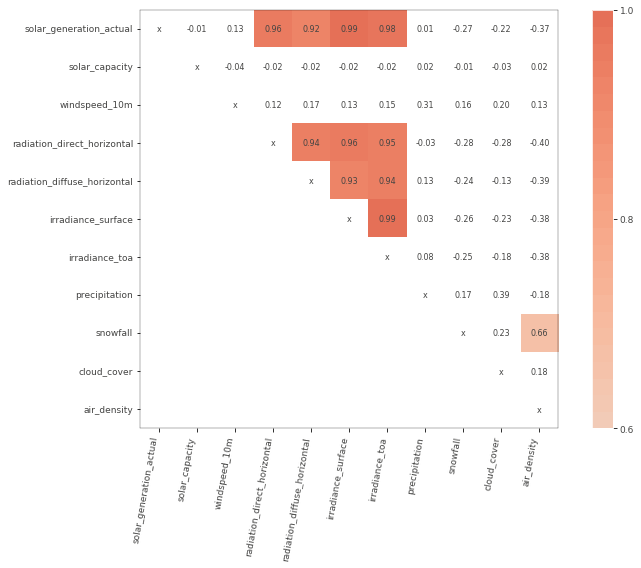

In [58]:
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(X_train, figsize=(12,8))
viz.view()

### 2.2 Training and validation of the RandomForestRegression model for selected features (n=8)

In [45]:
X_train = train[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual', 'solar_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [46]:
rf = RandomForestRegressor()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(rf, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decisions trees) and t+{i+1}h is: %0.3f" % np.mean(scores_solar))
    # validation of the model
    rf.fit(X_train, train[y_list[i]])
    predictions_rf = rf.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2) 


The average score for random forest regression (100 decisions trees) and t+1h is: 0.938
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.937

The average score for random forest regression (100 decisions trees) and t+2h is: 0.814
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.814

The average score for random forest regression (100 decisions trees) and t+3h is: 0.718
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.734

The average score for random forest regression (100 decisions trees) and t+4h is: 0.688
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = 0.719

The average score for random forest regression (100 decisions trees) and t+5h is: 0.642
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = 0.675

The average score for random forest regression (100 decisions trees) and t+6h is: 0.

### 2.3 Training and validation of the RandomForestRegression model for selected features (n=2)

In [71]:
X_train = train[['solar_generation_actual', 'irradiance_surface']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual', 'irradiance_surface']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [72]:
rf = RandomForestRegressor()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(rf, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decisions trees) and t+{i+1}h is: %0.3f" % np.mean(scores_solar))
    # validation of the model
    rf.fit(X_train, train[y_list[i]])
    predictions_rf = rf.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2) 


The average score for random forest regression (100 decisions trees) and t+1h is: 0.903
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.896

The average score for random forest regression (100 decisions trees) and t+2h is: 0.668
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.649

The average score for random forest regression (100 decisions trees) and t+3h is: 0.395
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.377

The average score for random forest regression (100 decisions trees) and t+4h is: 0.168
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = 0.152

The average score for random forest regression (100 decisions trees) and t+5h is: 0.020
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = 0.006

The average score for random forest regression (100 decisions trees) and t+6h is: -0

### 2.4 Training and validation of the RandomForestRegression model for most important feature: `solar_generation_actual`

In [73]:
X_train = train[['solar_generation_actual']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['solar_generation_actual']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [74]:
rf = RandomForestRegressor()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_solar = cross_val_score(rf, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decisions trees) and t+{i+1}h is: %0.3f" % np.mean(scores_solar))
    # validation of the model
    rf.fit(X_train, train[y_list[i]])
    predictions_rf = rf.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2) 


The average score for random forest regression (100 decisions trees) and t+1h is: 0.881
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.876

The average score for random forest regression (100 decisions trees) and t+2h is: 0.591
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.580

The average score for random forest regression (100 decisions trees) and t+3h is: 0.259
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.250

The average score for random forest regression (100 decisions trees) and t+4h is: -0.017
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = -0.012

The average score for random forest regression (100 decisions trees) and t+5h is: -0.185
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = -0.174

The average score for random forest regression (100 decisions trees) and t+6h is

\mathit{R}^{2}=1-\frac{\sum_{i}^{}\left ( y_{i} -y\widehat{}_{i}\right )^{2}}{\sum_{i}^{}\left ( y_{i} -y\bar{}\right )^{2}}

Negative coefficients of determination (R²) were obtained, which means that the sum squared regression error is  greater than the sum squared total error, i.e. the models fit worse than using the mean value for solar power generation as predictor. This is indicative of poor forecasting models (on negative r2 score: https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative).